# AOS111 week7
## Goals
- [ ] To implement a simple neural network model from scratch
- [ ] To understand the backpropagation algorithm
- [ ] Meet the famous MNIST dataset and the Tensorflow library
- [ ] ICC PART A: Implement the derivatives expression
- [ ] ICC PART B: Train the neural net (fit the parameters*)

*Please note this notebook can take several minutes to run during training

  Created by Donglai Ma, November 2020

## Neural network from scratch
This week we are going to implement a simple neural network from scratch! We are going to build our network for digit recongnition which is a popular starter problem in machine learning.

### MNIST dataset
The MNIST dataset is a famous dataset for digit recognition in machine learning.Think of it as the 'hello world' dataset for computer vision problems. You can find raw data and more information about this data set [here](http://yann.lecun.com/exdb/mnist/).
Remember that each sample is a 28x28 digital greyscale image.

In [1]:
### Load the MNIST dataset
from sklearn.datasets import fetch_openml

# This could take a few seconds
# This method of sklearn already did flatten, so you could see the shape of X is 784 = 28*28
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


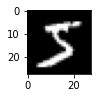

The target value is : 5


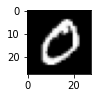

The target value is : 0


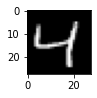

The target value is : 4


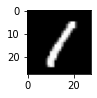

The target value is : 1


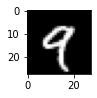

The target value is : 9


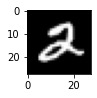

The target value is : 2


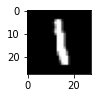

The target value is : 1


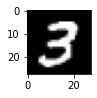

The target value is : 3


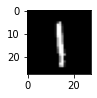

The target value is : 1


In [2]:
import matplotlib.pyplot as plt
#reshape the dataset back to 28 * 28
X_plot = X.reshape((len(X),28,28))
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_plot[i], cmap=plt.get_cmap('gray'))
    plt.show()
    print("The target value is :",y[i])

### The sturcture of our network
The basic problem is we have an input image coming into the neural network, and the output is going to be a guess of which digit is represented in the image.
So we will have a 784 neuron input layer (that's just 28x28=784) and the output layer is 10, where each of the outputs represents the propability for each class (i.e., which digit the network thinks that the input image represents).

### Data preprocessing step

In [3]:
## Data preprocessing
# The X array is in the range 0-255 which represents either a color in RGB or a greyscale intensity (it depends on the colormap we choose to use).
# For this problem, we need to rescale the data so its in the range 0-1, i.e., divide by 255.

from sklearn.model_selection import train_test_split
import numpy as np
print(X[0])
X_input = X/255.0

from sklearn.preprocessing import OneHotEncoder
labels  = np.array(y).reshape(len(y), -1)
enc = OneHotEncoder()
enc.fit(labels)
targets = enc.transform(labels).toarray()

print(targets[0:9])
# You could check it with '504292131'

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_input, targets, test_size=0.15, random_state=0)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

### Model initialization

*Please note that we are going to build a class to implement and demonstrate the network, so you will only need to add code in the final block. The individual functions below are broken out for ease of reading*

If you look at our network, we are going to build a 3-layer network which means we have 2 groups of 'lines' between these neurons and they represent the parameters of our neural network.

If we set the hidden layer size as 50
Notice here the 

W1 shape is (50,784),W2 shape is (10,50)
               
b1 shape is (50，1), b2 shape is (10,1)
                
Assume you have *m* samples for X and each sample is a column vector. so X is of dimension: (784, m)
So $Z_1 =  W_1 X + b$ ( remember when one shape of b is 1, it will broadcast from (50,1) to (50,m))


In [4]:
 def initialize(self):
    np.random.seed(1)

    for l in range(1, len(self.layers_shape)):
        self.parameters["W" + str(l)] = np.random.randn(self.layers_shape[l], self.layers_shape[l - 1]) / np.sqrt(
            self.layers_shape[l - 1])
        self.parameters["b" + str(l)] = np.zeros((self.layers_shape[l], 1))

### Forward propagation
For each neuron, it has input from the previous layer of neurons (multiplied by the parameter matrix) and it needs an activation function, to 'excite' it to get the output.

If we are using sigmoid as the activation function, then the output will be $\sigma(z)$ where $z = w \cdot x$

For a sigmoid function: $\sigma(z) = \frac{1}{1+e^{-z}}$


For easy coding I do not put b into that function, but you are welcome to modify that part of the code, although it shouldn't affect the main idea of our algorithm.

Note: It's different for the last layer. We want to return a probability value, such that all probabilities sum to 1,so 
**For the last layer, the activation function is chosen to be softmax (for a reminder, please check lecture 3.3)**

$$
\begin{aligned}
a_{i} &=\frac{c e^{z_{i}}}{c \sum_{k=1}^{c} e^{z_{k}}} \\
&=\frac{e^{z_{i}+\log c}}{\sum_{k=1}^{c} e^{z_{k}}+\log c}
\end{aligned}
$$
Usually 
$$
a_{i}=\frac{e^{z_{i}-\max (z)}}{\sum_{k=1}^{c} e^{z_{k}-\max (z)}}
$$
This avoids overflow when calculating the exponential

In [5]:
import numpy as np
def softmax(z):
    expz = np.exp(z - np.max(z))
    return expz/expz.sum(axis = 0,keepdims=True)
z = [1,2,5]
z_2 = [[1,2,5],
       [1,2,1]]
print(softmax(z))
print(softmax(z_2))


[0.01714783 0.04661262 0.93623955]
[[0.5        0.5        0.98201379]
 [0.5        0.5        0.01798621]]


### Calculate the loss
We are going to use cross-entropy to calculate the loss (check lecture 3.3 for a reminder)
$$
L=-\sum_{i=0}^{c} y_{i} \log a_{i}
$$


The gradient of the multiclass cross entropy is (here, I suggest you do the deduction, and remember your y is an element of {0,1}):
$$
\frac{dL}{dz_i} = a_i - y_i
$$
(This is for one sample, and you need to calculate the mean for *m* samples)
$\frac{dL}{dz_i} =\frac{1}{m} (a_i - y_i)$

In the neural network, usually *m* is not all the data samples but the batch size of your data. In this example, we don't use batch, so each time we give all the data samples to our model.

### Back propagation
First let's write a matrix formula.

Assume we have one hidden layer, so the parameters are $W_1,W_2,b_1,b_2$
The hidden layer output is $A_1$

The output layer result is $A_2$

$A_2 = softmax(Z_2)$

$Z_2 = W_2 A_1 +b_2$

$A_1 = sigmoid(Z_1)$ (in the following we write sigmoid as $\sigma$)

$Z_1 = W_1 X+b_1$



Then lets do the back propagation. 
Think of the chain rule you need to know, in following the gradient( take $W_2$ as an example)
$\frac{dL}{dW_2} = \frac{dL}{dA_2} \frac{dA_2}{dZ_2} \frac{dZ_2}{dW_2}$.
A trick for the softmax function is that we don't need to calculate $\frac{dL}{dA_2}$, we can directly calculate$\frac{dL}{dZ_2}$

So we have:
$$
\begin{aligned}
\frac{d L}{d W_2} &=\frac{d L}{d Z_2} \frac{d Z_2}{d W_2} \\
&=\left(A_2-Y\right) \frac{d}{d W_2}\left(W_2A_1 +b_2\right) \\
&=\left(A_2-Y\right) A_1^T
\end{aligned}
$$



$$
\begin{aligned}
\frac{d L}{d W_1} &=\frac{d L}{d Z_2} \frac{d Z_2}{d A_1} \frac{d A_1}{d Z_1} \frac{d Z_1}{d W_1} \\
&=\left(A_2-Y\right) \frac{d}{d A_1}\left(W_2A_1 +b_2\right) \\
& \frac{d}{d Z_1}\left(\sigma\left(Z_1\right)\right) \frac{d}{d W_1}\left(W_1A_0+b_1\right) \\
&=\left(A_2-Y\right) W_2 \sigma^{\prime}\left(Z_1\right) A_0^T
\end{aligned}
$$

$A_0$ is actually $X_{input}$ here if you have one hidden layer

### Building our model (ICC assignment here)

Please note that this takes a few minutes to train after you are finished coding.

Cost:  0.23863081470524444 Train Accuracy: 10.084033613445378
Time cost:  1.4662916660308838
Cost:  0.16222181706237046 Train Accuracy: 71.29747899159665
Time cost:  100.41966891288757
Cost:  0.1069143294864471 Train Accuracy: 79.65042016806723
Time cost:  199.74599289894104
Cost:  0.08003436705163436 Train Accuracy: 83.7546218487395
Time cost:  298.98397278785706
Cost:  0.0657862994395997 Train Accuracy: 85.68403361344538
Time cost:  397.96496772766113
Cost:  0.057153475778237275 Train Accuracy: 86.91932773109244
Time cost:  497.5666778087616
Cost:  0.05140419175806475 Train Accuracy: 87.7781512605042
Time cost:  601.4227890968323
Cost:  0.04731377847994538 Train Accuracy: 88.41344537815125
Time cost:  700.2796423435211
Cost:  0.04426077395771526 Train Accuracy: 88.87226890756303
Time cost:  798.8587193489075
Cost:  0.041896262656567505 Train Accuracy: 89.17310924369748
Time cost:  895.4199492931366
Train Accuracy: 89.46890756302521
Test Accuracy: 88.8


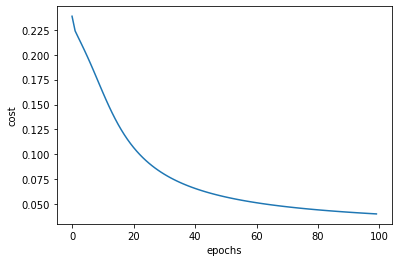

In [6]:
import numpy as np
import time

class MyNeuralNet(object):
    def __init__(self, input_size, hidden_size,output_size):
        self.layers_shape = [input_size,hidden_size,output_size]
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.parameters = {}
        self.costs = []
        # n is total number of input samples
        self.n = 0

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def softmax(z):
        expz = np.exp(z - np.max(z))
        return expz / expz.sum(axis=0, keepdims=True)

    @staticmethod
    def sigmoid_derivative(z):
        s = 1 / (1 + np.exp(-z))
        return s * (1 - s)

    def initialize(self):
        np.random.seed(1)

        for l in range(1, len(self.layers_shape)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_shape[l], self.layers_shape[l - 1]) / np.sqrt(
                self.layers_shape[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_shape[l], 1))

    def forward(self, X):
        store = {}

        A = X.T
        for l in range(2):#0,1
            Z = self.parameters["W" + str(l + 1)].dot(A) + self.parameters["b" + str(l + 1)]
            if l == 1:
                A = self.softmax(Z)
            else:
                A = self.sigmoid(Z)

            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z

        return A, store

    def backward(self, X, Y, store):

        derivatives = {}

        store["A0"] = X.T

        A2 = store["A2"]
        dLdZ2 = A2 - Y.T

        dW = dLdZ2.dot(store["A1"].T) / self.n
        db = np.sum(dLdZ2, axis=1, keepdims=True) / self.n
        dAPrev = store["W2"].T.dot(dLdZ2)

        derivatives["dW2"] = dW
        derivatives["db2"] = db

        dLdZ1 = dAPrev * self.sigmoid_derivative(store["Z1"])

        ############################# ICC PART A ###########################
        dW = 9999.9999
        db = 9999.9999
        ####################################################################


        derivatives["dW1"] = dW
        derivatives["db1"] = db

        return derivatives

    def fit(self, X, Y, learning_rate=0.01, n_iterations=1000):
        np.random.seed(1)

        self.n = X.shape[0]
        # Insert the input shape
        if X.shape[1] != self.input_size:
            raise ValueError('Input shape must be the same')

        self.initialize()
        time_start = time.time()
        for loop in range(n_iterations):
            A, store = self.forward(X)
            # avoid log 0
            cost = -np.mean(Y * np.log(A.T + 1e-8))
            derivatives = self.backward(X, Y, store)

            for l in range(1, 3):  # 1, 2
                ###################### ICC PART B ###########################
                self.parameters["W" + str(l)] = 9999.9999
                self.parameters["b" + str(l)] = 9999.9999
                #############################################################

            if loop % 100 == 0:
                print("Cost: ", cost, "Train Accuracy:", self.predict(X, Y))
                print("Time cost: ", time.time() - time_start)

            if loop % 10 == 0:
                self.costs.append(cost)

    def predict(self, X, Y):
        A, cache = self.forward(X)
        y_hat = np.argmax(A, axis=0)
        Y = np.argmax(Y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy * 100
    
    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("cost")
        plt.show()
    

ann = MyNeuralNet(784,64,10)
ann.fit(x_train, y_train, learning_rate=0.1, n_iterations=1000)
print("Train Accuracy:", ann.predict(x_train, y_train))
print("Test Accuracy:", ann.predict(x_test, y_test))
ann.plot_cost()

## Tensorflow
Congratulations!  You've built your own neural net model!

After going through this exercise, you have probably found that it's really hard to build a model from scratch (especially one that runs quickly!). Frotunately there are some powerful tools available to us for building complicated models that train very quickly.

[Tensorflow](https://www.tensorflow.org/) is one of the most famous ones around.
Here we give an example of using the tensorflow library. We are going to start by loading the dataset to see how simple tensorflow is to train a model.

You can find the original code [here](https://www.tensorflow.org/tutorials/quickstart/beginner)

PS. Remember to install the tensorflow first if you're not using colab.

!pip install tensorflow



In [7]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Notice this data the y is still (m,1) vector x is still(m,28,28) vector so the data is really raw data
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='sigmoid'),
  tf.keras.layers.Dense(10)
])
# We don't need to do onehot ourselves
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# You may have heard of the adam algorithm, which is an optimized gradient descent method
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
# You could check how to evaluate from that website

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4581 - accuracy: 0.8874
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2204 - accuracy: 0.9377
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1711 - accuracy: 0.9504
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1399 - accuracy: 0.9601
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1177 - accuracy: 0.9663
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1014 - accuracy: 0.9707
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0890 - accuracy: 0.9748
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0789 - accuracy: 0.9777
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0700 - accuracy: 0.9805
Epoch 10/10
1875/

## Pytorch
In addition to Tensorflow, another very popular and useful library is [Pytorch](https://pytorch.org/). Here is the same [example](https://pytorch.org/tutorials/beginner/nn_tutorial.html?highlight=mnist), but now implemented with the Pytorch library for your reference.

Now, go forth and build great models!